In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
PlayersDict={
    "Huskies_G1":0,
    "Huskies_D1":1,
    "Huskies_D2":2,
    "Huskies_D3":3,
    "Huskies_D4":4,
    "Huskies_D5":5,
    "Huskies_D6":6,
    "Huskies_D7":7,
    "Huskies_D8":8,
    "Huskies_D9":9,
    "Huskies_D10":10,
    "Huskies_M1":11,
    "Huskies_M2":12,
    "Huskies_M3":13,
    "Huskies_M4":14,
    "Huskies_M5":15,
    "Huskies_M6":16,
    "Huskies_M7":17,
    "Huskies_M8":18,
    "Huskies_M9":19,
    "Huskies_M10":20,
    "Huskies_M11":21,
    "Huskies_M12":22,
    "Huskies_M13":23,
    "Huskies_F1":24,
    "Huskies_F2":25,
    "Huskies_F3":26,
    "Huskies_F4":27,
    "Huskies_F5":28,
    "Huskies_F6":29
}
PlayersDictRev={v:k for k,v in PlayersDict.items()}
PlayersDictShort={
    "G1":0,
    "D1":1,
    "D2":2,
    "D3":3,
    "D4":4,
    "D5":5,
    "D6":6,
    "D7":7,
    "D8":8,
    "D9":9,
    "D10":10,
    "M1":11,
    "M2":12,
    "M3":13,
    "M4":14,
    "M5":15,
    "M6":16,
    "M7":17,
    "M8":18,
    "M9":19,
    "M10":20,
    "M11":21,
    "M12":22,
    "M13":23,
    "F1":24,
    "F2":25,
    "F3":26,
    "F4":27,
    "F5":28,
    "F6":29
}
PlayersDictShortRev={v:k for k,v in PlayersDictShort.items()}

In [45]:
PassTotal=[]
for _ in range(30):
    PassTotal.append([0]*30)
Pass=[]
for _ in range(38):
    temp=[]
    for _ in range(30):
        temp.append([0]*30)
    Pass.append(temp)

In [69]:
PassTotal=[]
for _ in range(30):
    PassTotal.append([0]*30)
Pass=[]
for _ in range(38):
    temp=[]
    for _ in range(30):
        temp.append([0]*30)
    Pass.append(temp)

data=pd.read_csv("passingevents.csv")
"""print(data["EventOrigin_x"].max(),data["EventOrigin_x"].min()) #100
print(data["EventOrigin_y"].max(),data["EventOrigin_y"].min())
print(data["EventDestination_x"].max(),data["EventDestination_x"].min())
print(data["EventDestination_y"].max(),data["EventDestination_y"].min())"""
N=data.shape[0]
#count=0
ValueDict = {"Cross":1.5, "Hand pass":0.1, "Head pass":0.8, "High pass":0.9, "Launch":0.5, "Simple pass":1.2, "Smart pass":5.0}
def GoalDistance(x):
    x1 = data['EventOrigin_x'][x]
    # y1 = data['EventOrigin_y'][x]
    x2 = data['EventDestination_x'][x]
    # y2 = data['EventDestination_y'][x]
    # return (np.sqrt((x1-100)*(x1-100)+(y1-50)*(y1-50))+np.sqrt((x2-100)*(x2-100)+(y2-50)*(y2-50)))/2.0/100.0
    return ((0.5 * np.tan(11.0/6.0 * ((100-x1)/100.0 - 0.6))) + (0.5 * np.tan(11.0/6.0 * ((100-x2)/100.0 - 0.6))))/2.0
def EvaluatePass(x):
    return ValueDict[data['EventSubType'][x]] * GoalDistance(x)

for i in range(N):
    if (data["TeamID"][i]=="Huskies"):
        OP=data["OriginPlayerID"][i]
        DP=data["DestinationPlayerID"][i]
        """if OP==DP:
            print(data[i:i+1])
            count+=1"""
        PassValue = EvaluatePass(i)
        PassTotal[PlayersDict[OP]][PlayersDict[DP]] += PassValue
        Pass[data["MatchID"][i]-1][PlayersDict[OP]][PlayersDict[DP]] += PassValue
#print(count)
"""temp=pd.DataFrame(PassTotal).rename(columns=PlayersDictShortRev,index=PlayersDictShortRev)
temp.to_csv("./Pass/Total.csv")"""
#print(pd.DataFrame(PassTotal))
#print(pd.DataFrame(Pass[0]))
"""for i in range(38):
    temp=pd.DataFrame(Pass[i])
    #temp[temp == 0] = np.nan
    temp=temp.replace(0,np.nan)
    temp=temp.dropna(axis=0, how='all', thresh=None, subset=None, inplace=False)
    temp=temp.dropna(axis=1, how='all', thresh=None, subset=None, inplace=False)
    temp=temp.fillna(value=0,axis=0)
    temp=temp.fillna(value=0,axis=1)
    """"""for j in range(30):
        temp=temp[temp[j]!=0]""""""
    #temp=temp.loc[:, (temp != 0).any(axis=0)]
    temp=pd.DataFrame(np.array(temp).astype("int64"))
    temp=temp.rename(columns=PlayersDictShortRev,index=PlayersDictShortRev)
    temp.to_csv("./Pass/Match"+str(i+1)+".csv")"""

'for i in range(38):\n    temp=pd.DataFrame(Pass[i])\n    #temp[temp == 0] = np.nan\n    temp=temp.replace(0,np.nan)\n    temp=temp.dropna(axis=0, how=\'all\', thresh=None, subset=None, inplace=False)\n    temp=temp.dropna(axis=1, how=\'all\', thresh=None, subset=None, inplace=False)\n    temp=temp.fillna(value=0,axis=0)\n    temp=temp.fillna(value=0,axis=1)\n    for j in range(30):\n        temp=temp[temp[j]!=0]\n    #temp=temp.loc[:, (temp != 0).any(axis=0)]\n    temp=pd.DataFrame(np.array(temp).astype("int64"))\n    temp=temp.rename(columns=PlayersDictShortRev,index=PlayersDictShortRev)\n    temp.to_csv("./Pass/Match"+str(i+1)+".csv")'

In [70]:
doub=[]
trip=[]
quad=[]
for i in range(30):
    iname=PlayersDictRev[i]
    index=iname.find("_")
    iname=iname[index+1:]
    for j in range(i+1,30):
        jname=PlayersDictRev[j]
        index=jname.find("_")
        jname=jname[index+1:]
        sum=PassTotal[i][j]+PassTotal[j][i]
        doub.append([sum,iname,jname])
        for k in range(j+1,30):
            kname=PlayersDictRev[k]
            index=kname.find("_")
            kname=kname[index+1:]
            sum=PassTotal[i][j]+PassTotal[j][i]+PassTotal[i][k]+PassTotal[k][i]+PassTotal[k][j]+PassTotal[j][k]
            trip.append([sum,iname,jname,kname])
            for l in range(k+1,30):
                lname=PlayersDictRev[l]
                index=lname.find("_")
                lname=lname[index+1:]
                sum=PassTotal[i][j]+PassTotal[j][i]+PassTotal[i][k]+PassTotal[k][i]+PassTotal[k][j]+PassTotal[j][k]+PassTotal[i][l]+PassTotal[l][i]+PassTotal[j][l]+PassTotal[l][j]+PassTotal[k][l]+PassTotal[l][k]
                quad.append([sum,iname,jname,kname,lname])

doub.sort(key=lambda x:x[0],reverse=True)
trip.sort(key=lambda x:x[0],reverse=True)
quad.sort(key=lambda x:x[0],reverse=True)
print(doub[:10],"\n")
print(trip[:10],"\n")
print(quad[:10],"\n")

[[39.361512103948066, 'G1', 'D1'], [37.34073749578412, 'G1', 'D3'], [17.776206677092073, 'G1', 'D2'], [13.53948989158517, 'G1', 'D6'], [9.712427441461086, 'D1', 'D3'], [9.683348342278652, 'G1', 'D5'], [8.473900775422884, 'G1', 'D7'], [7.851944882074543, 'G1', 'M1'], [7.010461691200657, 'G1', 'D4'], [6.9382693524091845, 'D1', 'D2']] 

[[86.41467704119327, 'G1', 'D1', 'D3'], [64.07598813344933, 'G1', 'D1', 'D2'], [59.01775790190171, 'G1', 'D2', 'D3'], [52.43219096427202, 'G1', 'D1', 'D6'], [51.64931497940576, 'G1', 'D3', 'D6'], [47.456561946711695, 'G1', 'D3', 'D5'], [47.0537013476767, 'G1', 'D1', 'M3'], [46.63944967712046, 'G1', 'D1', 'D4'], [46.22826828966842, 'G1', 'D1', 'D5'], [45.65808541980546, 'G1', 'D1', 'D7']] 

[[115.02996679972004, 'G1', 'D1', 'D2', 'D3'], [100.25444349355368, 'G1', 'D1', 'D3', 'D6'], [95.47103061969666, 'G1', 'D1', 'D3', 'M3'], [93.71390933556253, 'G1', 'D1', 'D3', 'D5'], [91.87666204456488, 'G1', 'D1', 'D3', 'D4'], [91.02327507767461, 'G1', 'D1', 'D3', 'D9']

'f, ax = plt.subplots(figsize=(6, 6))\ncmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)\nsns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True)'

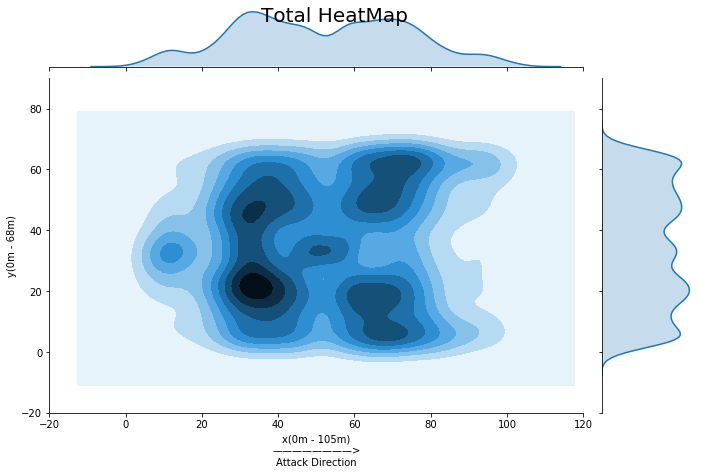

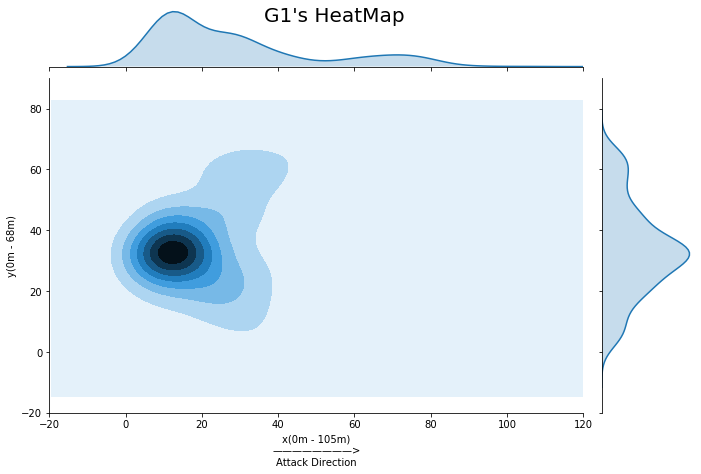

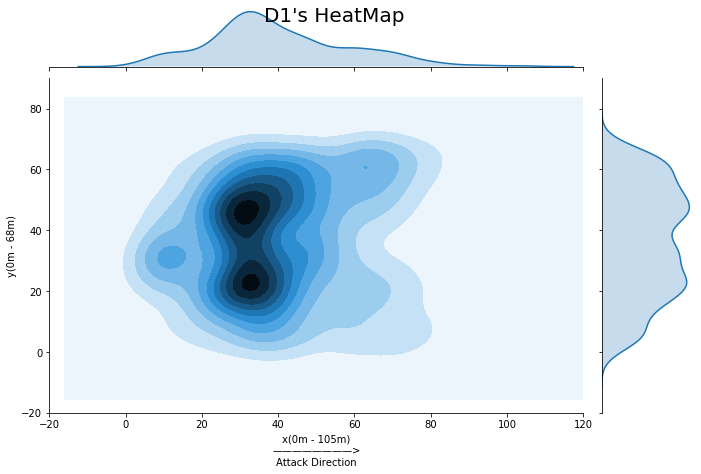

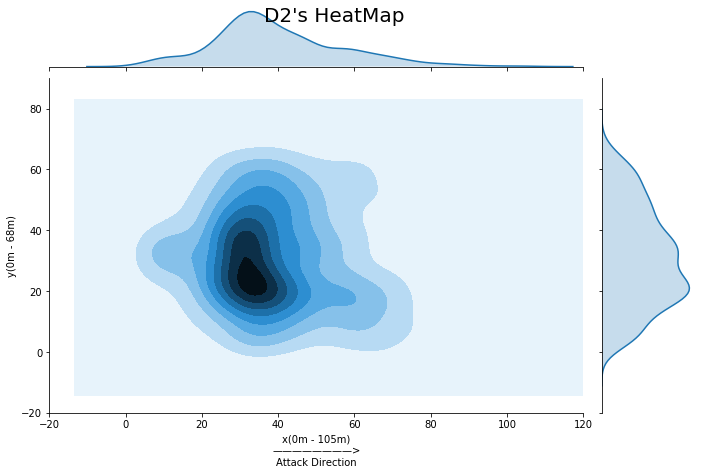

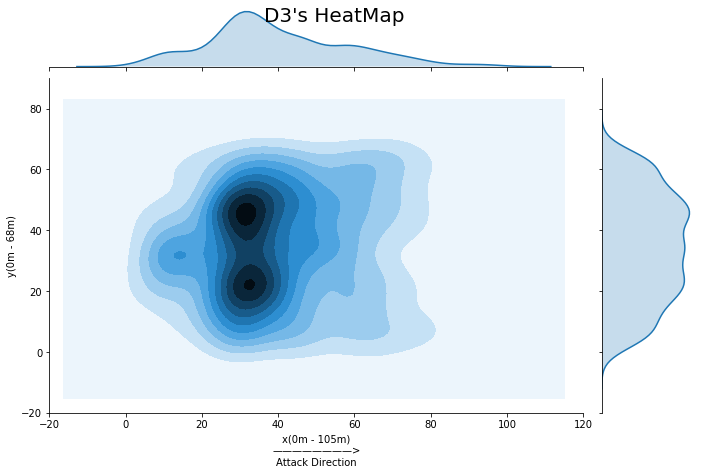

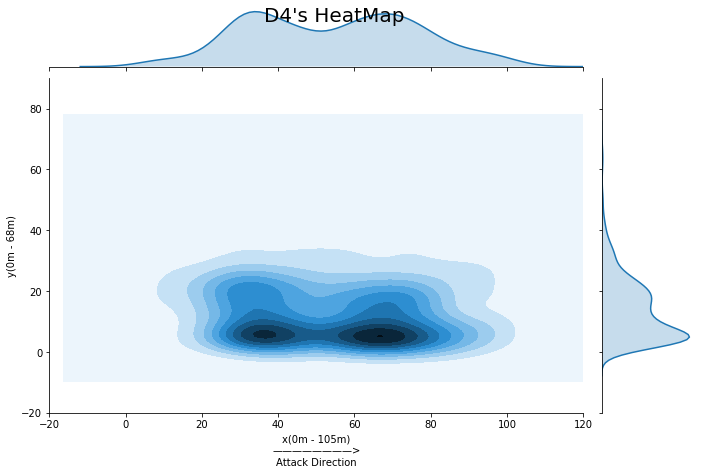

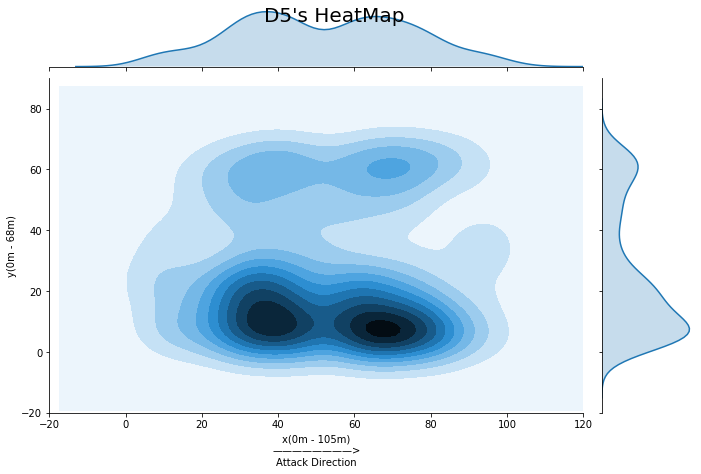

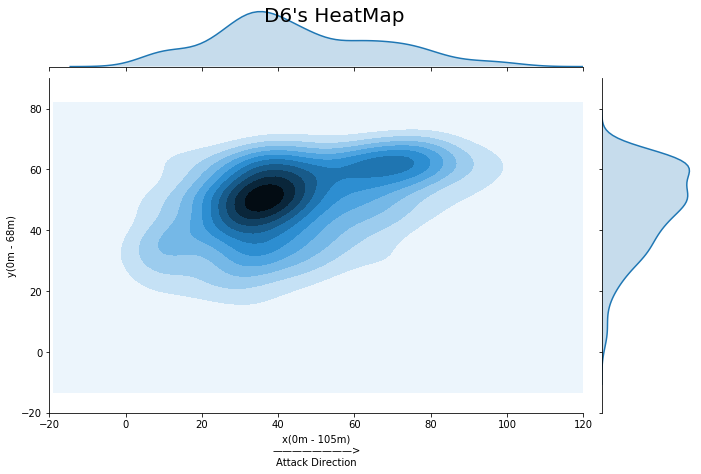

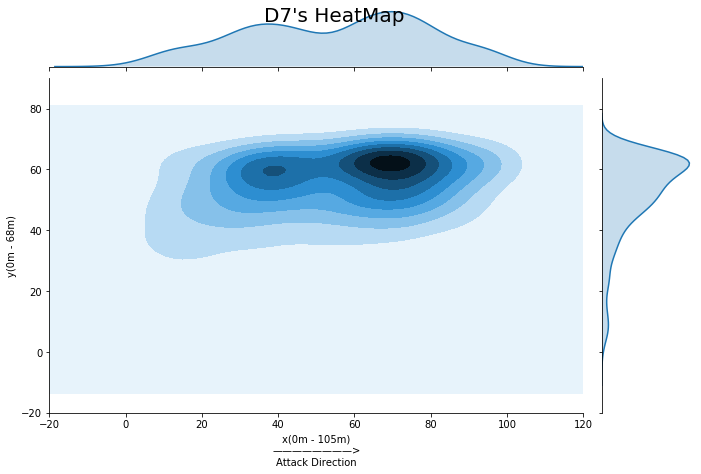

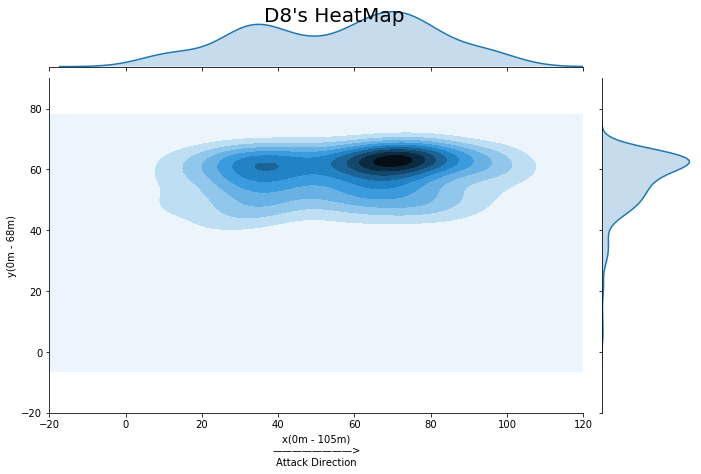

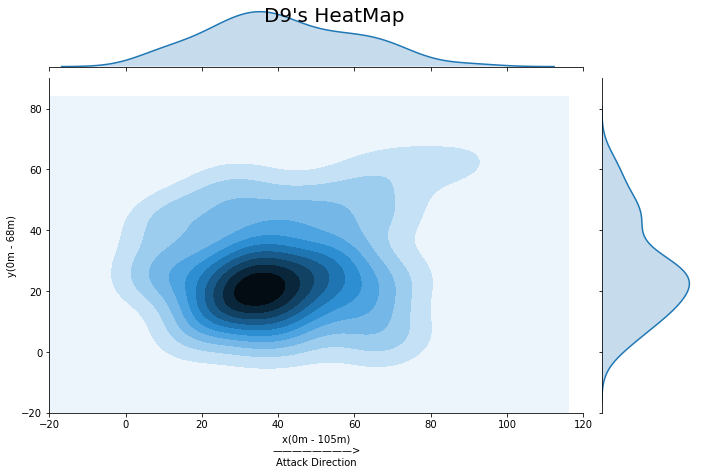

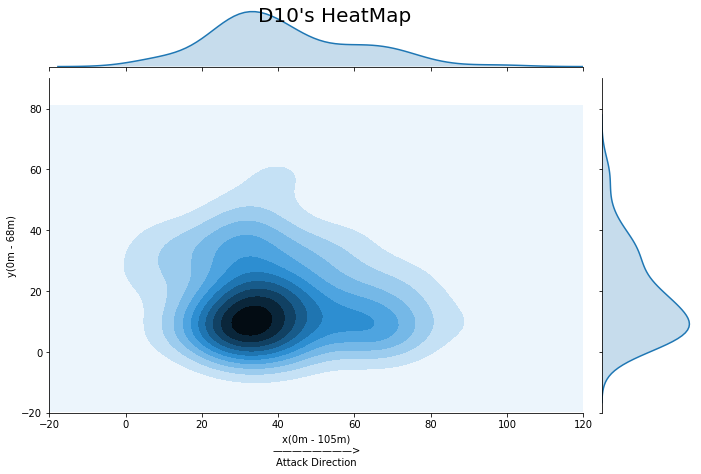

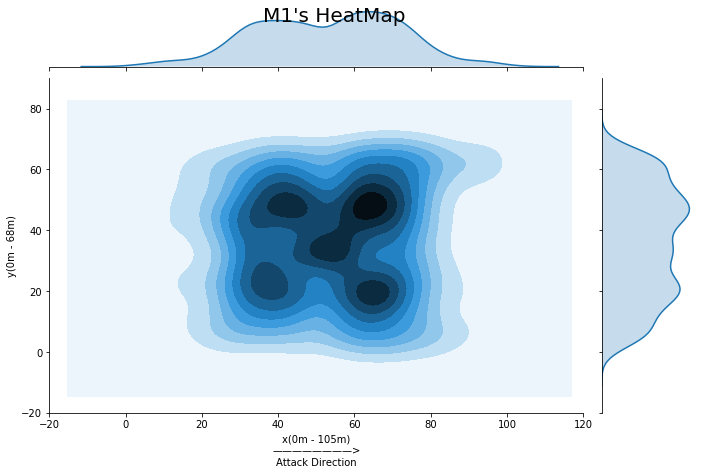

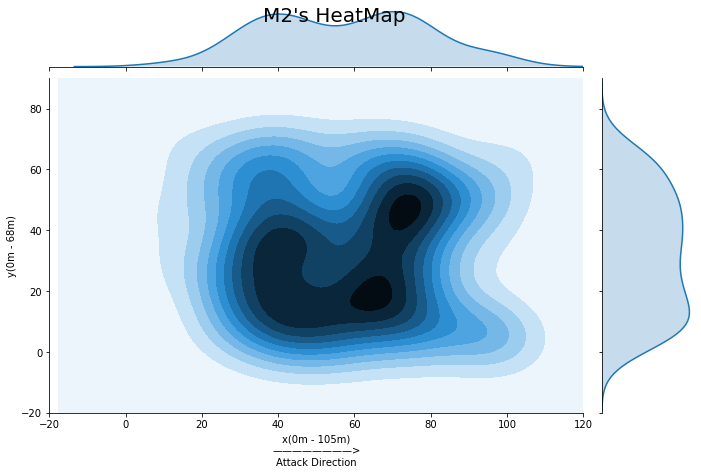

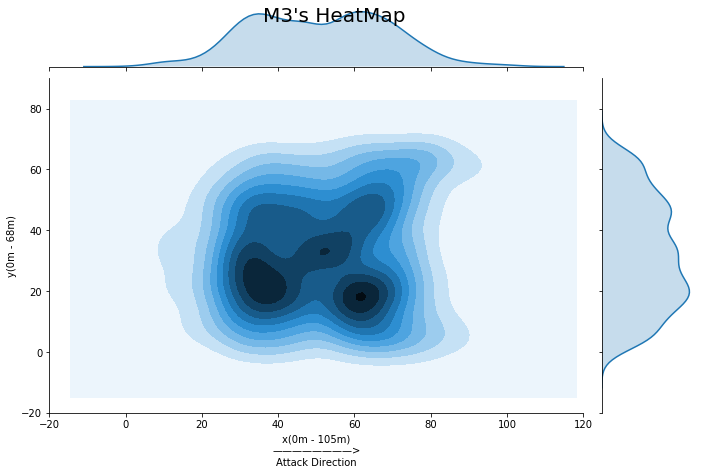

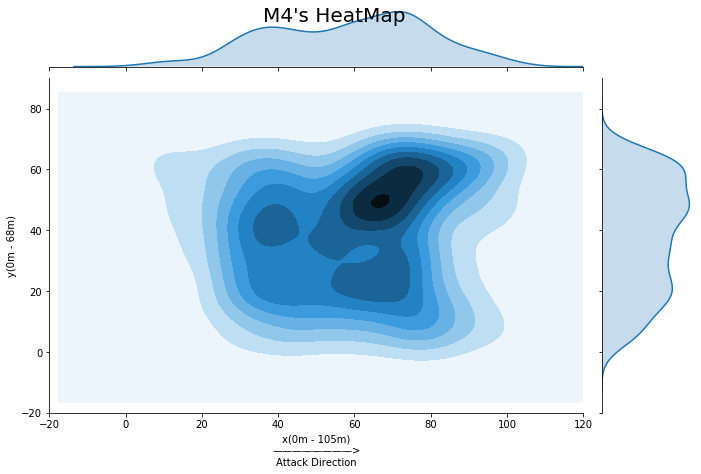

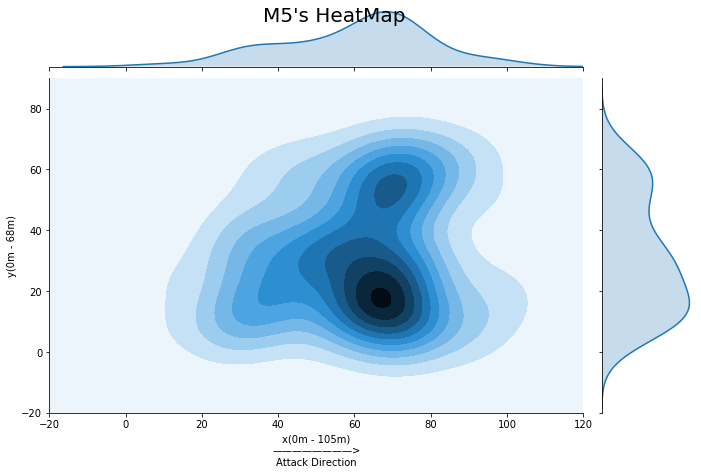

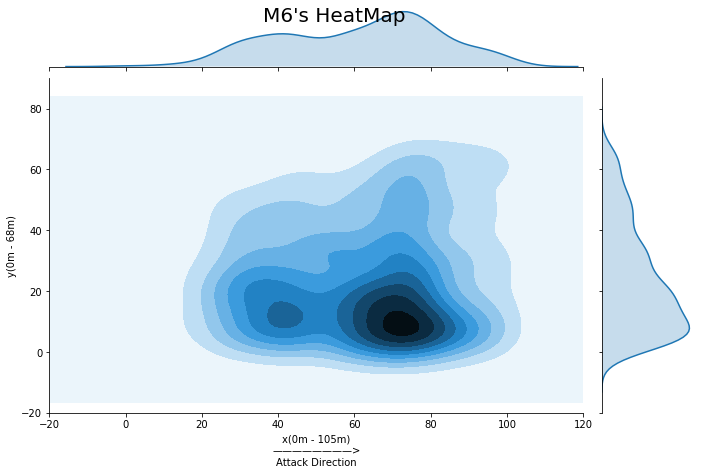

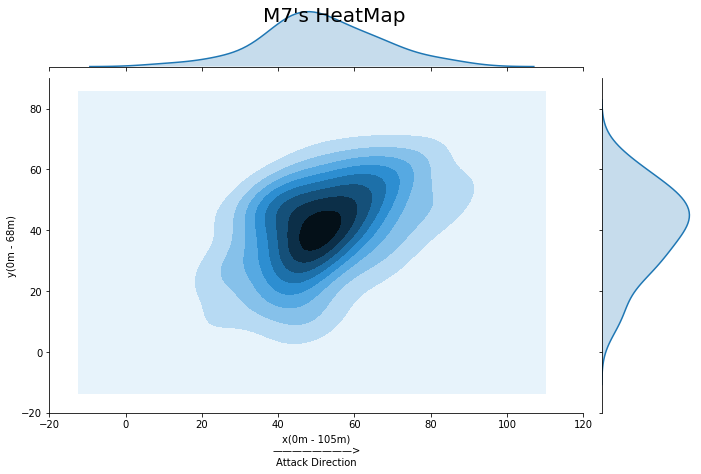

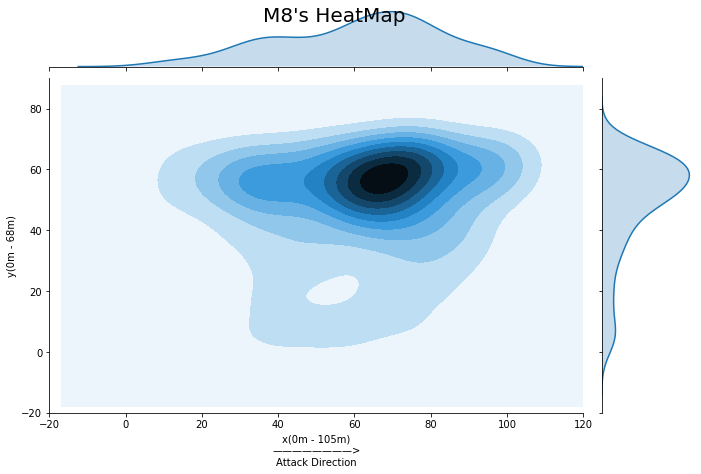

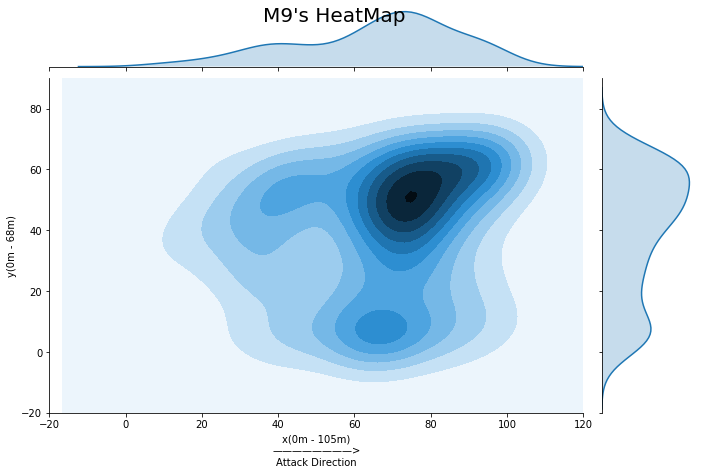

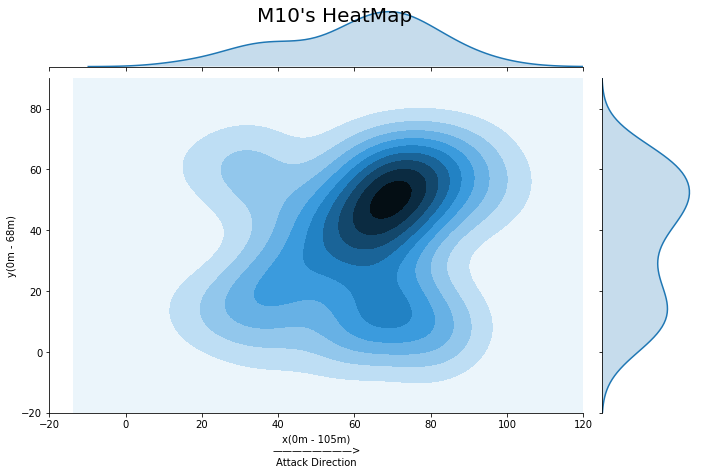

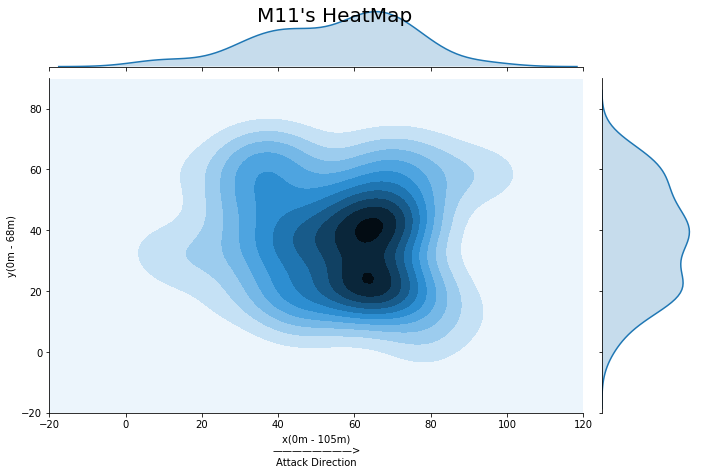

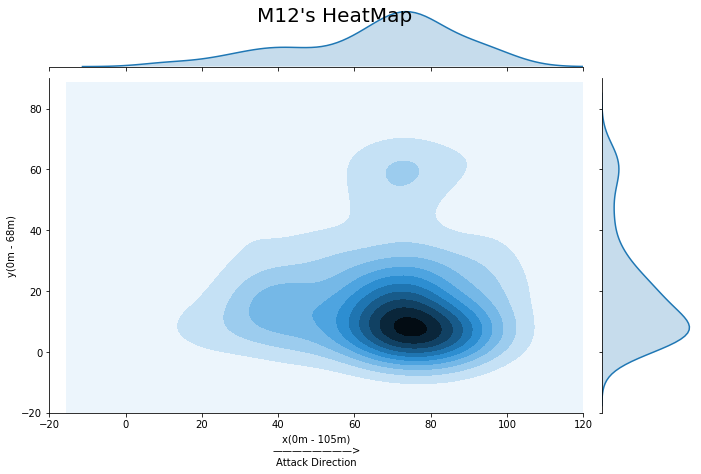

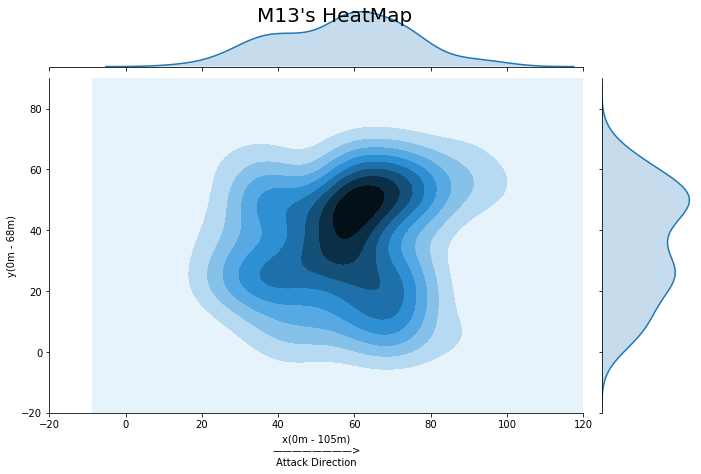

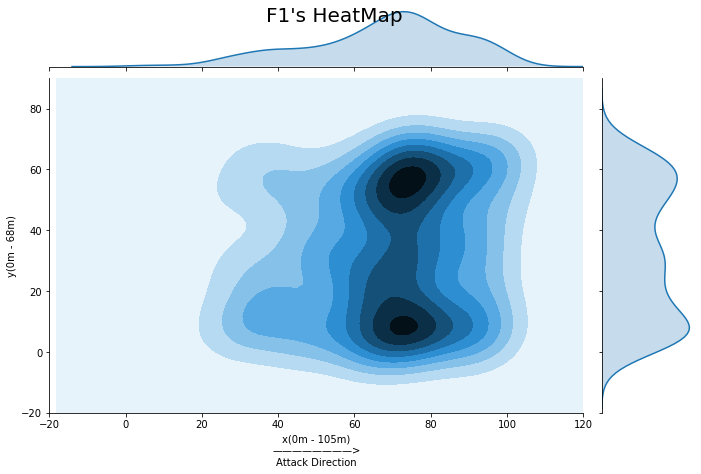

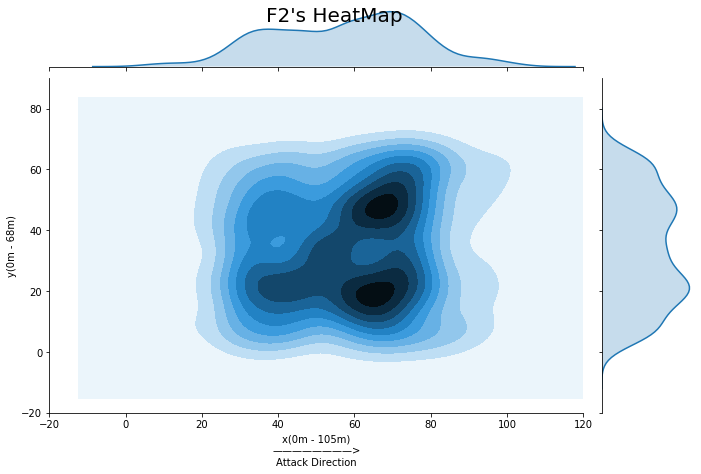

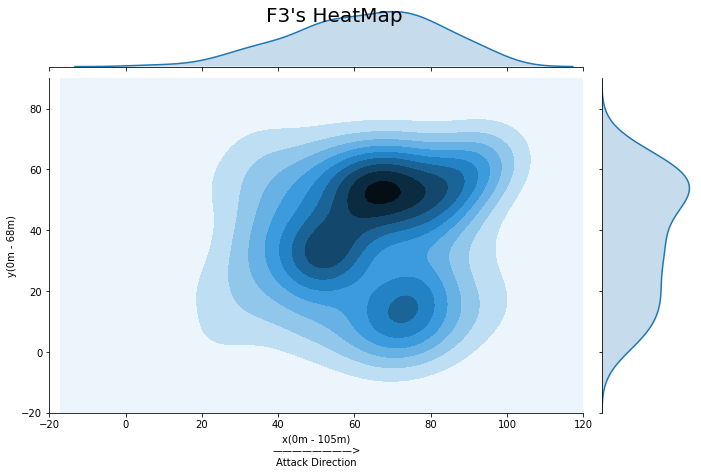

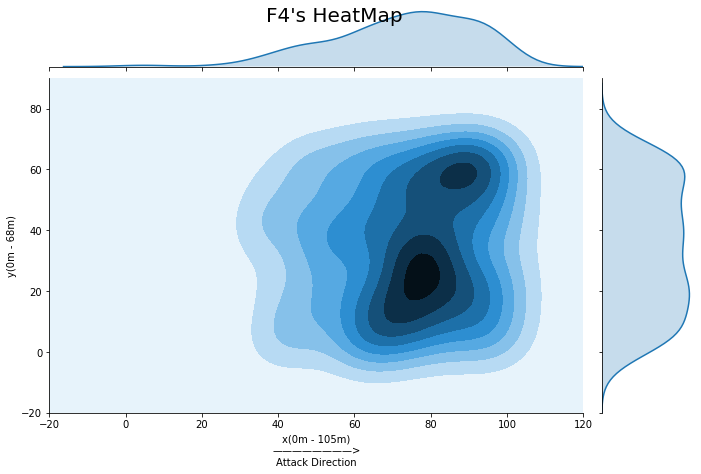

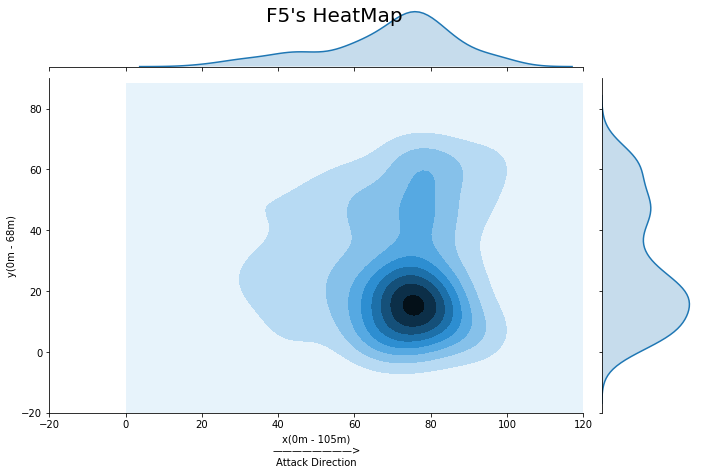

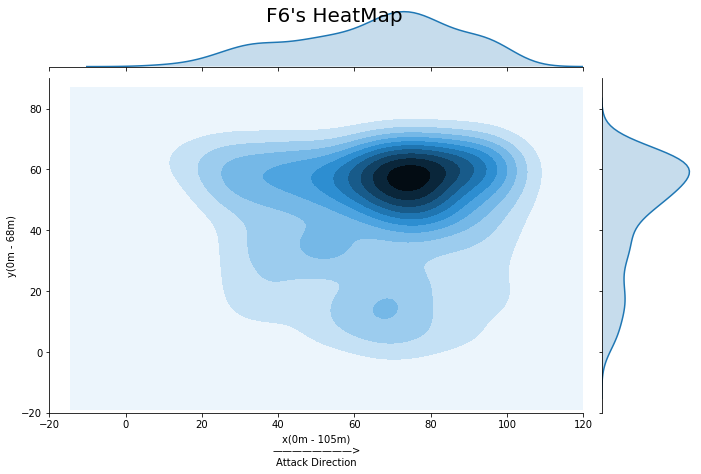

In [48]:
# -*- coding: utf-8 -*-

#All Players
data=pd.read_csv("passingevents.csv")
N=data.shape[0]
xy=[]
for i in range(N):
    if data["TeamID"][i]=="Huskies":
        x=data["EventOrigin_x"][i]*1.05
        y=data["EventOrigin_y"][i]*0.68
        xy.append((x,y))
        x=data["EventDestination_x"][i]*1.05
        y=data["EventDestination_y"][i]*0.68
        xy.append((x,y))

df = pd.DataFrame(xy, columns=["x(0m - 105m)\n————————>\nAttack Direction", "y(0m - 68m)"])
g=sns.jointplot(x="x(0m - 105m)\n————————>\nAttack Direction", y="y(0m - 68m)", data=df, kind="kde",xlim=(-20,120),ylim=(-20,90))
g.fig.set_figwidth(10.5)
g.fig.set_figheight(6.8)
g.fig.suptitle("Total HeatMap",fontsize=20)
g.savefig("./HeatMap/Origin/Total HeatMap.png", dpi=300)



#Single Player
data=pd.read_csv("passingevents.csv")
N=data.shape[0]
for j in range(30):
    xy=[]
    for i in range(N):
        if data["TeamID"][i]=="Huskies" and data["OriginPlayerID"][i]==PlayersDictRev[j]:
            x=data["EventOrigin_x"][i]*1.05
            y=data["EventOrigin_y"][i]*0.68
            xy.append((x,y))
            x=data["EventDestination_x"][i]*1.05
            y=data["EventDestination_y"][i]*0.68
            xy.append((x,y))

    df = pd.DataFrame(xy, columns=["x(0m - 105m)\n————————>\nAttack Direction", "y(0m - 68m)"])
    g=sns.jointplot(x="x(0m - 105m)\n————————>\nAttack Direction", y="y(0m - 68m)", data=df, kind="kde",xlim=(-20,120),ylim=(-20,90))
    g.fig.set_figwidth(10.5)
    g.fig.set_figheight(6.8)
    g.fig.suptitle(PlayersDictShortRev[j]+"'s HeatMap",fontsize=20)
    g.savefig("./HeatMap/Origin/"+PlayersDictShortRev[j]+"'s HeatMap.png", dpi=300)


"""f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True)"""

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

points = np.arange(-5,5,0.01)

x,y = np.meshgrid(points,points)
z = np.sqrt(x**2 + y**2)
cmaps = [plt.cm.jet, plt.cm.gray, plt.cm.cool, plt.cm.hot]

fig, axes = plt.subplots(2, 2)

for i, ax in enumerate(axes.ravel()):
    ax.imshow(z,cmap=cmaps[i])

plt.show()

In [36]:
from pyheatmap.heatmap import HeatMap
import numpy as np

data=pd.read_csv("passingevents.csv")
N=data.shape[0]
xy=[]
for i in range(N):
    if data["TeamID"][i]=="Huskies":
        x=data["EventOrigin_x"][i]*2
        y=data["EventOrigin_y"][i]
        xy.append([x,y,1])
heat = HeatMap(xy)
heat.heatmap(save_as="2.png")

ModuleNotFoundError: No module named 'pyheatmap'

In [ ]:
# -*- coding: utf-8 -*-

from PIL import Image
foreground = Image.open("./HeatMap/lines.png")
for i in range(30):
    background = Image.open("./HeatMap/Origin/"+PlayersDictShortRev[i]+"'s HeatMap.png")
    background.paste(foreground, (525, 607), foreground)
    background.save("./HeatMap/"+PlayersDictShortRev[i]+"'s HeatMap.png")
background = Image.open("./HeatMap/Origin/Total HeatMap.png")
background.paste(foreground, (525, 607), foreground)
background.save("./HeatMap/Total.png")